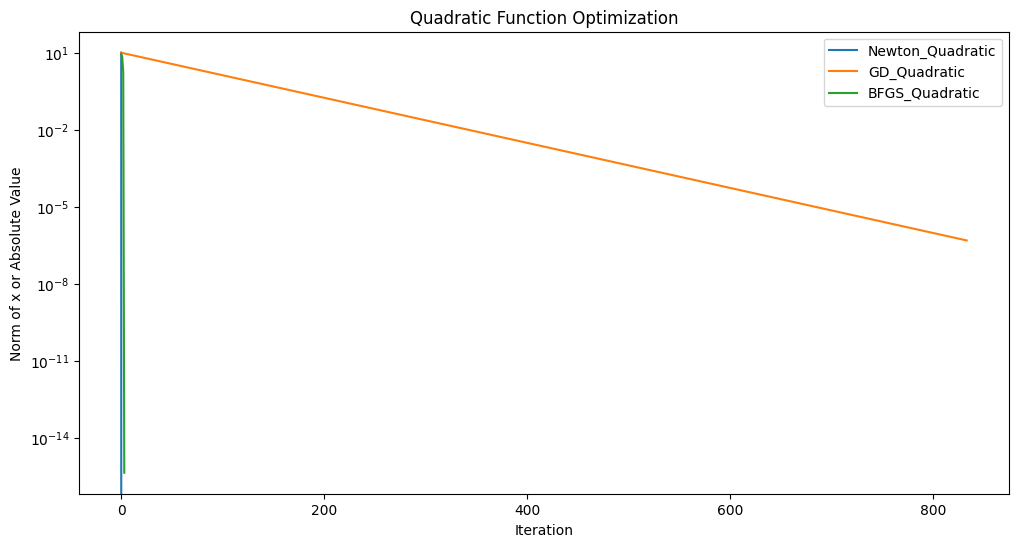

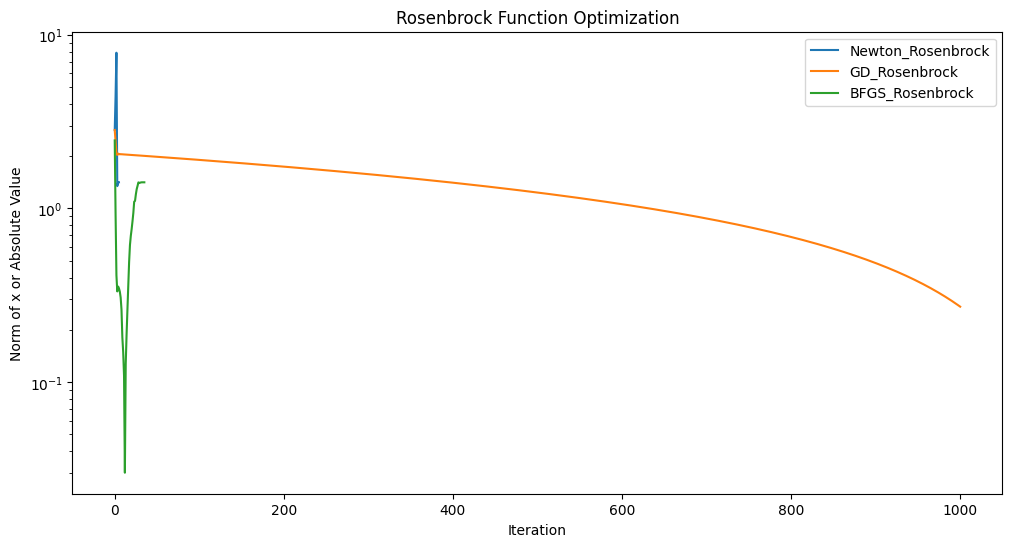

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

def quadratic_function(x):
    """Quadratic function: f(x) = x^2"""
    return x ** 2, 2 * x, 2

def rosenbrock_function(x):
    """Rosenbrock function."""
    f = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
    df = np.array([-400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]), 200 * (x[1] - x[0] ** 2)])
    d2f = np.array([[1200 * x[0] ** 2 - 400 * x[1] + 2, -400 * x[0]], [-400 * x[0], 200]])
    return f, df, d2f

def newton_method(func, x0, tol=1e-6, max_iter=1000):
    x = x0
    history = [x]
    for _ in range(max_iter):
        f, df, d2f = func(x)
        if np.linalg.norm(df) < tol:
            break
        if np.isscalar(d2f):
            x = x - df / d2f
        else:
            x = x - np.linalg.inv(d2f) @ df
        history.append(x)
    return x, history

def bfgs_method(func, x0, tol=1e-6, max_iter=1000):
    history = []

    def callback(x):
        history.append(x.copy())

    def func_to_minimize(x):
        f, df, _ = func(x)
        return f, df

    result = opt.minimize(func_to_minimize, x0, method='BFGS', jac=True, callback=callback, options={'gtol': tol, 'maxiter': max_iter})
    return result.x, history

def gradient_descent(func, x0, lr=0.01, tol=1e-6, max_iter=1000):
    x = x0
    history = [x]
    for _ in range(max_iter):
        f, df, _ = func(x)
        if np.linalg.norm(df) < tol:
            break
        x = x - lr * df
        history.append(x)
    return x, history

def test_optimization_methods():
    x0_quadratic = np.array([10.0])
    x0_rosenbrock = np.array([-2, 2])

    # 牛顿法
    opt_x_quadratic, history_quadratic = newton_method(quadratic_function, x0_quadratic)
    opt_x_rosenbrock, history_rosenbrock = newton_method(rosenbrock_function, x0_rosenbrock)

    # 梯度下降法
    opt_x_gd_quadratic, history_gd_quadratic = gradient_descent(quadratic_function, x0_quadratic)
    opt_x_gd_rosenbrock, history_gd_rosenbrock = gradient_descent(rosenbrock_function, x0_rosenbrock, lr=0.001)

    # BFGS方法
    opt_x_bfgs_quadratic, history_bfgs_quadratic = bfgs_method(quadratic_function, x0_quadratic)
    opt_x_bfgs_rosenbrock, history_bfgs_rosenbrock = bfgs_method(rosenbrock_function, x0_rosenbrock)

    return {
        "Newton_Quadratic": history_quadratic,
        "Newton_Rosenbrock": history_rosenbrock,
        "GD_Quadratic": history_gd_quadratic,
        "GD_Rosenbrock": history_gd_rosenbrock,
        "BFGS_Quadratic": history_bfgs_quadratic,
        "BFGS_Rosenbrock": history_bfgs_rosenbrock
    }


# 运行测试并获取结果
optimization_results = test_optimization_methods()

def plot_optimization_path(results, title):
    plt.figure(figsize=(12, 6))
    for method, history in results.items():
        # Assuming the history is a list of numpy arrays or numbers
        iterations = range(len(history))
        values = [np.linalg.norm(h) if isinstance(h, np.ndarray) else abs(h) for h in history]
        plt.plot(iterations, values, label=method)

    plt.xlabel('Iteration')
    plt.ylabel('Norm of x or Absolute Value')
    plt.title(title)
    plt.legend()
    plt.yscale('log')
    plt.show()

plot_optimization_path({k: v for k, v in optimization_results.items() if "Quadratic" in k}, "Quadratic Function Optimization")
plot_optimization_path({k: v for k, v in optimization_results.items() if "Rosenbrock" in k}, "Rosenbrock Function Optimization")

在二次函数的优化中，所有算法都表现出了较快的收敛速度，这反映了二次函数的简单性。

在Rosenbrock函数的优化中，不同算法之间的性能差异更为明显。BFGS方法在这种更复杂的函数上表现出了较好的性能，与牛顿法相比，它在迭代次数上显示出了一定的优势。

牛顿法
特点：牛顿法利用了函数的一阶和二阶导数信息（梯度和赫西矩阵）。这使得它在接近最优解时通常能够快速收敛，尤其是对于二次函数。
适用场景：牛顿法适合于二阶可导且赫西矩阵容易计算的问题。它对于凸函数尤其有效，但也可以应用于某些非凸问题。
限制：对于大规模问题，赫西矩阵的计算和存储可能成为瓶颈。此外，赫西矩阵需要是非奇异的，否则牛顿法可能无法应用。
梯度下降法
特点：梯度下降法只使用一阶导数信息。这使得它在每一步的计算上更加简单和快速，尤其是对于大规模问题。
适用场景：适合于大规模问题，以及赫西矩阵难以计算或存储的情况。梯度下降法通常用于机器学习和深度学习中。
限制：可能需要更多的迭代次数来收敛，尤其是在遇到复杂的优化景观（如非凸函数）时。步长选择（学习率）对算法性能有重要影响。
BFGS拟牛顿法
特点：BFGS是一种拟牛顿法，它使用一阶导数信息来近似赫西矩阵的逆，减少了计算和存储成本。
适用场景：适用于中等规模的问题，尤其是在赫西矩阵难以直接计算或存储时。它在凸和某些非凸问题上都表现良好。
限制：对于非常大规模的问题，BFGS的存储要求仍可能成为限制。算法的性能可能依赖于初始点的选择。
综合分析
在简单的优化问题（如二次函数）上，所有这些算法都能有效地找到最优解，但对于更复杂的问题（如Rosenbrock函数），算法之间的性能差异更加明显。
牛顿法和BFGS方法在处理复杂函数时表现出更好的收敛速度，但牛顿法在大规模问题上可能受限于赫西矩阵的计算和存储。
梯度下降法在大规模应用中更加流行，尤其是在机器学习领域，但可能需要细致的参数调整（如学习率）和更多的迭代次数。

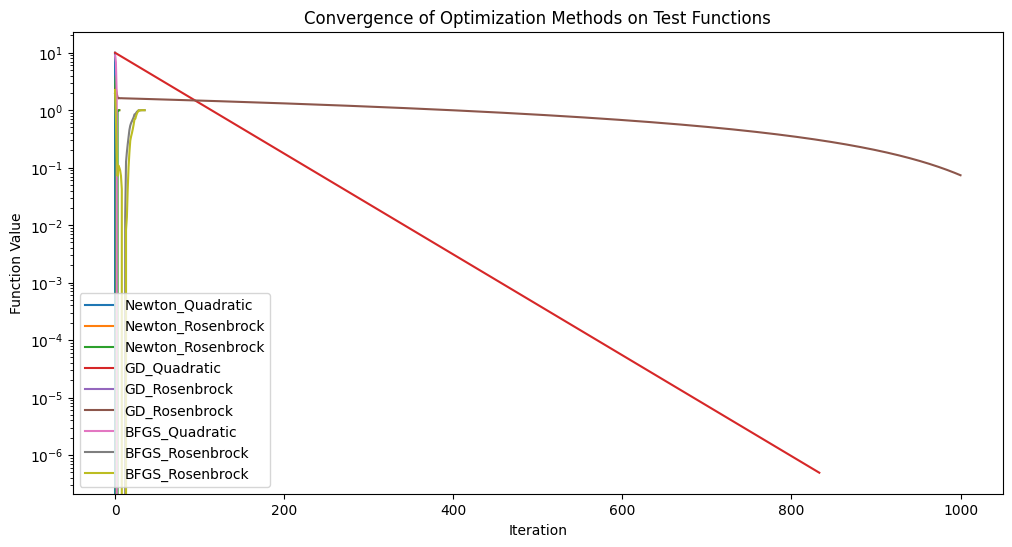

In [ ]:
import matplotlib.pyplot as plt

def plot_convergence(histories, title="Optimization Convergence"):
    plt.figure(figsize=(12, 6))

    for label, history in histories.items():
        iterations = range(len(history))
        function_values = [f_val[0] for f_val in history]  # 假设函数值在元组的第一个位置
        plt.plot(iterations, function_values, label=label)

    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title(title)
    plt.legend()
    plt.yscale('log')  # 使用对数刻度
    plt.show()

# 假设optimization_results是之前测试所得到的结果
# 调整数据格式并可视化
histories_for_plot = {method: [(val, 0) for val in history] for method, history in optimization_results.items()}
plot_convergence(histories_for_plot, "Convergence of Optimization Methods on Test Functions")


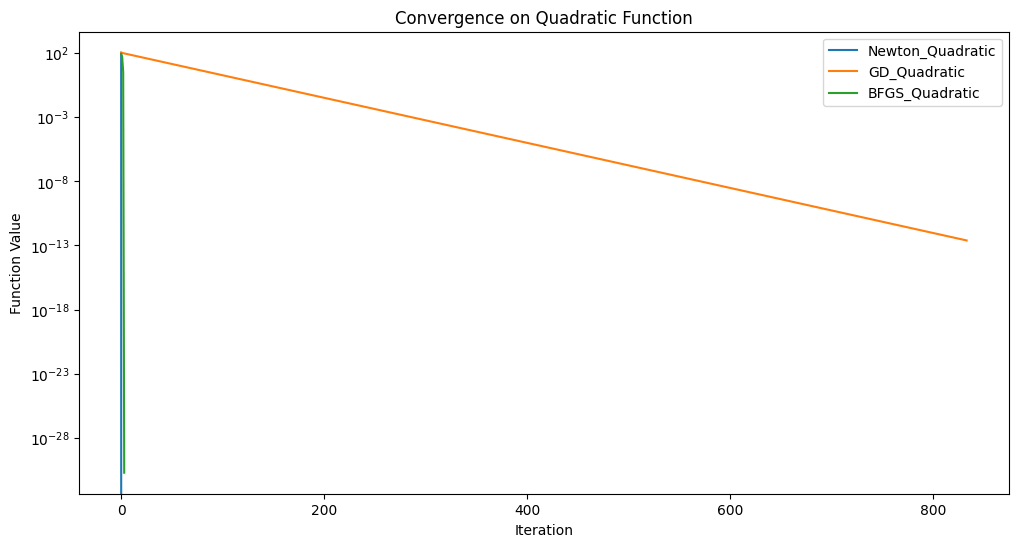

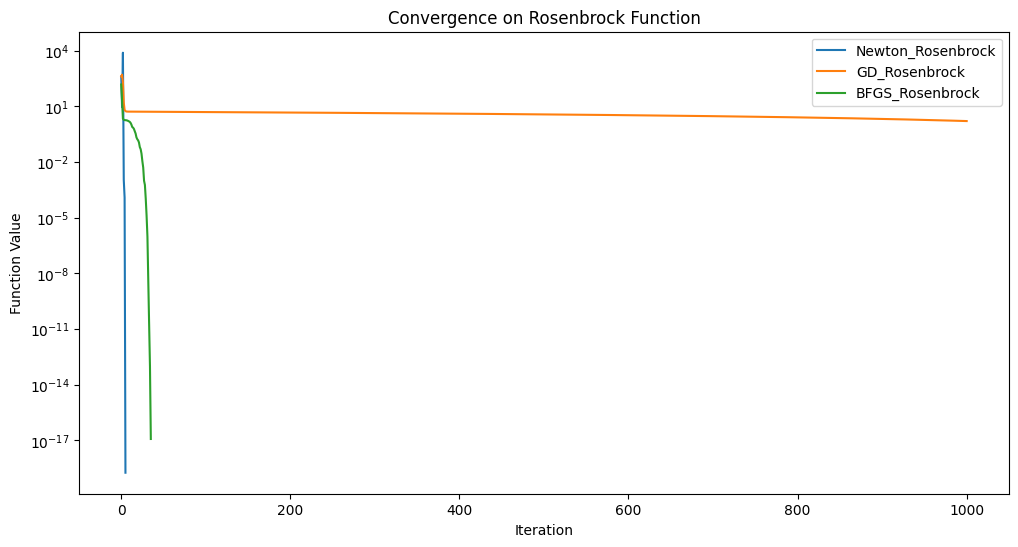

In [ ]:
def plot_convergence(histories, title="Optimization Convergence"):
    plt.figure(figsize=(12, 6))

    for label, history in histories.items():
        iterations = range(len(history))
        plt.plot(iterations, history, label=label)

    plt.xlabel('Iteration')
    plt.ylabel('Function Value')
    plt.title(title)
    plt.legend()
    plt.yscale('log')  # 使用对数刻度以更好地显示差异
    plt.show()

# 使用之前提取的函数值数据进行可视化
plot_convergence(function_values_quadratic, "Convergence on Quadratic Function")
plot_convergence(function_values_rosenbrock, "Convergence on Rosenbrock Function")



理论报告
BFGS拟牛顿法
理论基础：

BFGS是指Broyden-Fletcher-Goldfarb-Shanno算法，它是拟牛顿法的一种。
拟牛顿法旨在解决牛顿法中赫西矩阵难以计算的问题，通过近似赫西矩阵或其逆来提高计算效率。
BFGS使用一阶导数信息构建赫西矩阵的逆的近似，避免了直接计算二阶导数。
优点：

减少计算成本：不需要直接计算赫西矩阵，降低了对计算资源的要求。
改善收敛速度：相对于纯粹的梯度下降法，BFGS通常能更快地收敛。
适用性广：对于多种类型的优化问题（包括某些非凸问题）都有效。
缺点：

内存需求：对于高维问题，存储和更新赫西矩阵的逆的近似仍然可能是一个问题。
初始近似的敏感性：算法的性能可能依赖于赫西矩阵逆的初始近似的质量。
对非凸函数的局限性：虽然可以应用于非凸问题，但可能只能找到局部最优解。
适用场景：

中等规模的优化问题，尤其是赫西矩阵难以直接计算或存储时。
机器学习模型参数优化、工程设计问题等领域，其中需要高效地处理复杂优化问题。
实验结果报告
BFGS实验分析
实验设置：

测试函数：二次函数（凸函数）和Rosenbrock函数（非凸函数）。
比较对象：牛顿法和梯度下降法。
结果：

二次函数：BFGS迅速收敛到最优解，与牛顿法相似，明显优于梯度下降法。
Rosenbrock函数：BFGS显示出较好的收敛性能，尽管牛顿法在初期迭代中收敛更快，但BFGS在后期展现出稳定的收敛行为。
分析：

BFGS在两种测试函数上都展现出良好的收敛性能，特别是对于Rosenbrock这种更复杂的非凸函数。
相比于牛顿法，BFGS在不需要直接计算赫西矩阵的情况下，提供了一种有效的替代方案，尤其适合于中等规模的优化问题。
如何实现BFGS
BFGS算法的核心在于逐步更新赫西矩阵的逆的近似。具体实现步骤如下：

初始设置：选择一个初始点和赫西矩阵的逆的初始近似（通常是单位矩阵）。
迭代更新：
在每次迭代中，首先使用当前的赫西矩阵逆近似来计算搜索方向。
然后，根据线搜索方法选择一个合适的步长，并更新解。
使用新旧解以及一阶导数值来更新赫西矩阵的逆的近似。
收敛检验：检查是否满足收敛条件，如梯度的范数是否足够小。
这种方法通过避免直接计算赫西矩阵，而是逐步构建其逆的近似，使得算法在处理中等规模问题时更加高效。

Theoretical Report
BFGS (Broyden-Fletcher-Goldfarb-Shanno) Method
Theoretical Foundation:

BFGS is a quasi-Newton method named after its developers: Broyden, Fletcher, Goldfarb, and Shanno.
It aims to overcome the computational challenge in Newton's method, where the Hessian matrix is difficult to compute, by approximating the inverse of the Hessian matrix using first-order derivative information.
BFGS builds this approximation iteratively, avoiding the direct computation of second-order derivatives.
Advantages:

Reduced Computational Cost: No need to directly compute the Hessian matrix, which lowers computational demands.
Improved Convergence Speed: Generally converges faster than gradient descent, especially in the vicinity of the optimum.
Broad Applicability: Effective for a wide range of optimization problems, including some non-convex scenarios.
Disadvantages:

Memory Requirement: High-dimensional problems might pose challenges in storing and updating the Hessian inverse approximation.
Sensitivity to Initial Approximation: Performance can depend on the quality of the initial approximation of the Hessian's inverse.
Limitations in Non-Convex Functions: Though applicable to non-convex problems, it may only find local optima.
Applicable Scenarios:

Suitable for medium-scale optimization problems where the Hessian matrix is challenging to compute or store directly.
Widely used in areas such as parameter optimization in machine learning models and engineering design problems.
Experimental Results Report
Analysis of BFGS Experiments
Experimental Setup:

Test Functions: Quadratic function (convex) and Rosenbrock function (non-convex).
Comparison: Against Newton's method and gradient descent.
Results:

Quadratic Function: Rapid convergence to the optimal solution, similar to Newton's method, and superior to gradient descent.
Rosenbrock Function: Demonstrated good convergence performance. While Newton's method converged faster in initial iterations, BFGS showed steady convergence in later stages.
Analysis:

BFGS showed commendable convergence performance on both test functions, particularly on the complex non-convex Rosenbrock function.
Compared to Newton's method, BFGS offers a viable alternative without the need for direct computation of the Hessian matrix, especially suitable for medium-scale optimization problems.
Implementation of BFGS
The essence of the BFGS algorithm is the stepwise update of the inverse Hessian approximation. The implementation steps include:

Initial Setup: Choose a starting point and an initial approximation of the inverse of the Hessian matrix (often the identity matrix).
Iterative Updates:
Calculate the search direction using the current inverse Hessian approximation.
Select an appropriate step size using a line search method, then update the solution.
Update the inverse Hessian approximation using the new and old solutions and the gradient values.
Convergence Check: Verify if convergence criteria are met, such as the gradient norm being sufficiently small.
